In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import shutil

# Import Data

## Ekstrak emotion dari audio files dengan regex

In [2]:
base_dirs = ["Audio_Song_Actors_01-24", "Audio_Speech_Actors_01-24"]
output_dir = r"Emotions"

os.makedirs(output_dir, exist_ok=True)

# Regex for filenames like: 03-02-01-01-01-01-01.wav
pattern = re.compile(
    r"(?P<modality>\d{2})-(?P<vocal_channel>\d{2})-(?P<emotion>\d{2})-(?P<intensity>\d{2})-(?P<statement>\d{2})-(?P<repetition>\d{2})-(?P<actor>\d{2})\.wav"
)

emotion_labels = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised",
}

for base_dir in base_dirs:
    for actor_folder in os.listdir(base_dir):
        actor_path = os.path.join(base_dir, actor_folder)
        if not os.path.isdir(actor_path):
            continue

        # Loop through audio files in each actor folder
        for file_name in os.listdir(actor_path):
            match = pattern.match(file_name)
            if not match:
                continue  # skip invalid names

            emotion_code = match.group("emotion")
            emotion = emotion_labels.get(emotion_code, "unknown")

            # Create emotion folder
            emotion_path = os.path.join(output_dir, emotion)
            os.makedirs(emotion_path, exist_ok=True)

            # Copy or move file (use move if you prefer)
            src = os.path.join(actor_path, file_name)
            dst = os.path.join(emotion_path, file_name)
            shutil.copy2(src, dst)



## Taruh didalam dataframe

In [3]:
import os
import pandas as pd

# Label dictionaries
modality = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
vocal_channel = {'01': 'speech', '02': 'song'}
emotion = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
intensity = {'01': 'normal', '02': 'strong'}
statement = {'01': 'Kids are talking by the door', '02': 'Dogs are sitting by the door'}
repetition = {'01': '1st repetition', '02': '2nd repetition'}

# Folder with emotion subfolders
base_path = "Emotions"

data = []

# Loop through each emotion folder
for emotion_folder in os.listdir(base_path):
    emotion_path = os.path.join(base_path, emotion_folder)
    if not os.path.isdir(emotion_path):
        continue
    
    for filename in os.listdir(emotion_path):
        if not filename.lower().endswith('.wav'):
            continue
        
        parts = filename.split('.')[0].split('-')
        if len(parts) != 7:
            continue
        
        file_info = {
            'Filename': filename,
            'Filepath': os.path.join(emotion_path, filename),
            'Modality': modality.get(parts[0]),
            'Vocal Channel': vocal_channel.get(parts[1]),
            'Emotion': emotion.get(parts[2]),
            'Intensity': intensity.get(parts[3]),
            'Statement': statement.get(parts[4]),
            'Repetition': repetition.get(parts[5]),
            'Actor': int(parts[6]),
            'Gender': 'male' if int(parts[6]) % 2 == 1 else 'female'
        }
        data.append(file_info)

df = pd.DataFrame(data)
print(df.head())
print(f"\n✅ Total files loaded: {len(df)}")


                   Filename                                 Filepath  \
0  03-01-05-01-01-01-01.wav  Emotions\angry\03-01-05-01-01-01-01.wav   
1  03-01-05-01-01-01-02.wav  Emotions\angry\03-01-05-01-01-01-02.wav   
2  03-01-05-01-01-01-03.wav  Emotions\angry\03-01-05-01-01-01-03.wav   
3  03-01-05-01-01-01-04.wav  Emotions\angry\03-01-05-01-01-01-04.wav   
4  03-01-05-01-01-01-05.wav  Emotions\angry\03-01-05-01-01-01-05.wav   

     Modality Vocal Channel Emotion Intensity                     Statement  \
0  audio-only        speech   angry    normal  Kids are talking by the door   
1  audio-only        speech   angry    normal  Kids are talking by the door   
2  audio-only        speech   angry    normal  Kids are talking by the door   
3  audio-only        speech   angry    normal  Kids are talking by the door   
4  audio-only        speech   angry    normal  Kids are talking by the door   

       Repetition  Actor  Gender  
0  1st repetition      1    male  
1  1st repetition     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Filename       2452 non-null   object
 1   Filepath       2452 non-null   object
 2   Modality       2452 non-null   object
 3   Vocal Channel  2452 non-null   object
 4   Emotion        2452 non-null   object
 5   Intensity      2452 non-null   object
 6   Statement      2452 non-null   object
 7   Repetition     2452 non-null   object
 8   Actor          2452 non-null   int64 
 9   Gender         2452 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.7+ KB


# EDA

In [5]:
df.isnull().sum()

Filename         0
Filepath         0
Modality         0
Vocal Channel    0
Emotion          0
Intensity        0
Statement        0
Repetition       0
Actor            0
Gender           0
dtype: int64

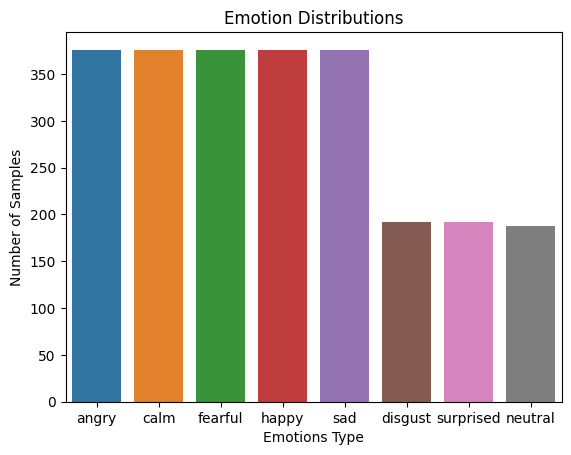

In [6]:
plt.Figure(figsize=(10,5))
sns.countplot(x='Emotion', data=df, order=df['Emotion'].value_counts().index)
plt.title('Emotion Distributions')
plt.xlabel('Emotions Type')
plt.ylabel('Number of Samples')
plt.show()

In [7]:
emotions_count = df['Emotion'].value_counts(normalize=True) * 100

print(emotions_count.round(2))

Emotion
angry        15.33
calm         15.33
fearful      15.33
happy        15.33
sad          15.33
disgust       7.83
surprised     7.83
neutral       7.67
Name: proportion, dtype: float64


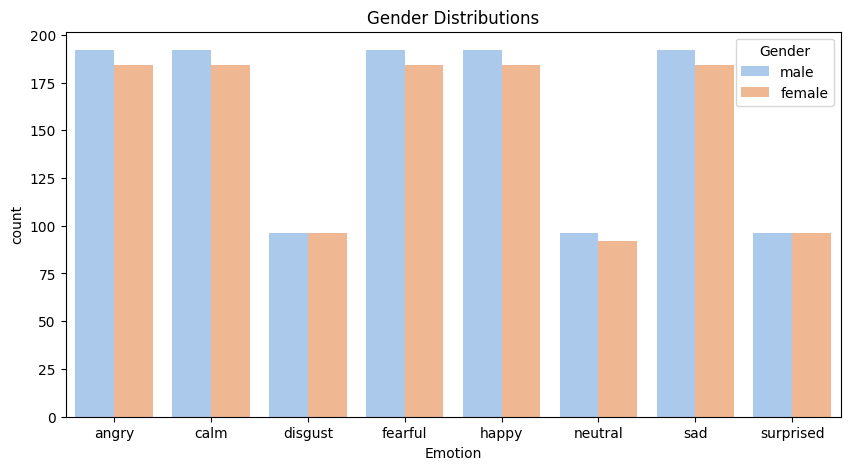

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', hue='Gender' ,data=df, palette='pastel')
plt.title('Gender Distributions')
plt.show()

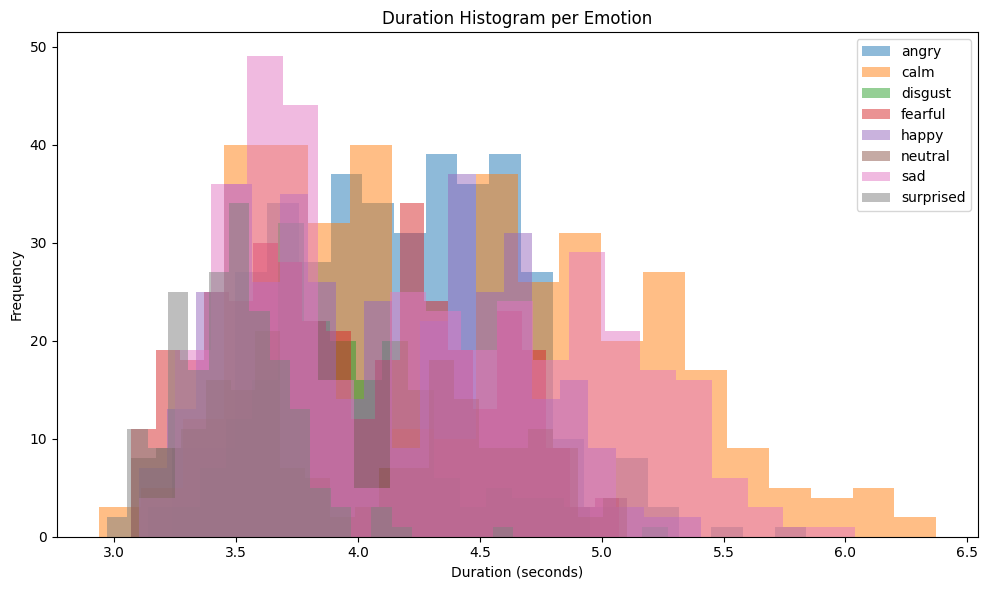

In [9]:
import librosa

durations = []
for filepath in df["Filepath"]:
    try:
        duration = librosa.get_duration(path=filepath)
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        duration = None
    durations.append(duration)

df["Duration"] = durations

plt.figure(figsize=(10, 6))
for emotion in df["Emotion"].unique():
    subset = df[df["Emotion"] == emotion]
    plt.hist(subset["Duration"], bins=20, alpha=0.5, label=emotion)
plt.title("Duration Histogram per Emotion")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# Preprocessing

In [10]:
import seaborn as sns
import librosa, librosa.display
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
df['Actor'] = df['Actor'].astype(int)
df['path'] = df.apply(lambda r: os.path.join(base_path, f"Actor_{int(r['Actor']):02d}", r['Filename']), axis=1)

print("Total Files: ", len(df))
print(df['Emotion'].value_counts())
print(df[['Actor', 'Gender']].value_counts())

Total Files:  2452
Emotion
angry        376
calm         376
fearful      376
happy        376
sad          376
disgust      192
surprised    192
neutral      188
Name: count, dtype: int64
Actor  Gender
1      male      104
2      female    104
23     male      104
22     female    104
21     male      104
20     female    104
19     male      104
17     male      104
16     female    104
15     male      104
14     female    104
13     male      104
12     female    104
11     male      104
10     female    104
9      male      104
8      female    104
7      male      104
6      female    104
5      male      104
4      female    104
3      male      104
24     female    104
18     female     60
Name: count, dtype: int64


In [12]:
df.drop(columns=['path'])

,Filename,Filepath,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Actor,Gender,Duration
0,03-01-05-01-01-01-01.wav,Emotions\angry\03-01-05-01-01-01-01.wav,audio-only,speech,angry,normal,Kids are talking by the door,1st repetition,1,male,3.870542
1,03-01-05-01-01-01-02.wav,Emotions\angry\03-01-05-01-01-01-02.wav,audio-only,speech,angry,normal,Kids are talking by the door,1st repetition,2,female,3.670333
2,03-01-05-01-01-01-03.wav,Emotions\angry\03-01-05-01-01-01-03.wav,audio-only,speech,angry,normal,Kids are talking by the door,1st repetition,3,male,4.004000
3,03-01-05-01-01-01-04.wav,Emotions\angry\03-01-05-01-01-01-04.wav,audio-only,speech,angry,normal,Kids are talking by the door,1st repetition,4,female,3.703708
4,03-01-05-01-01-01-05.wav,Emotions\angry\03-01-05-01-01-01-05.wav,audio-only,speech,angry,normal,Kids are talking by the door,1st repetition,5,male,3.870542
...,...,...,...,...,...,...,...,...,...,...,...
2447,03-01-08-02-02-02-20.wav,Emotions\surprised\03-01-08-02-02-02-20.wav,audio-only,speech,surprised,strong,Dogs are sitting by the door,2nd repetition,20,female,3.436771
2448,03-01-08-02-02-02-21.wav,Emotions\surprised\03-01-08-02-02-02-21.wav,audio-only,speech,surprised,strong,Dogs are sitting by the door,2nd repetition,21,male,3.536875
2449,03-01-08-02-02-02-22.wav,Emotions\surprised\03-01-08-02-02-02-22.wav,audio-only,speech,surprised,strong,Dogs are sitting by the door,2nd repetition,22,female,3.636958
2450,03-01-08-02-02-02-23.wav,Emotions\surprised\03-01-08-02-02-02-23.wav,audio-only,speech,surprised,strong,Dogs are sitting by the door,2nd repetition,23,male,3.303292


In [13]:
# Parameters
SR = 16000
N_Mels = 128
Target_Width = 128

# --- Helper functions ---
def load_audio(path, sr=SR):
    y, _ = librosa.load(path, sr=sr)
    y, _ = librosa.effects.trim(y)
    return y

def wav_to_mel(path, sr=SR, n_mels=N_Mels, target_width=Target_Width):
    try:
        y = load_audio(path, sr)
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return None

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    S_db = librosa.power_to_db(S, ref=np.max)

    if S_db.shape[1] < target_width:
        pad_width = target_width - S_db.shape[1]
        S_db = np.pad(S_db, ((0, 0), (0, pad_width)), mode='constant')
    else:
        S_db = S_db[:, :target_width]

    S_Norm = (S_db - S_db.min()) / (S_db.max() - S_db.min() + 1e-6)

    img = S_Norm.astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3

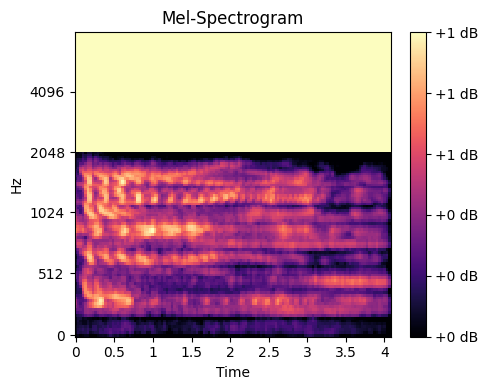

In [14]:
sample_img = wav_to_mel(df.iloc[0]['Filepath'])
plt.figure(figsize=(5, 4))
librosa.display.specshow(
    sample_img[:, :, 0].T,
    sr=SR,
    x_axis='time',
    y_axis='mel'
)
plt.title("Mel-Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

Dari pola garis-garis horizontal yang jelas, bisa disimpulkan ini adalah suara bernada yang stabil, seperti vokal manusia yang sedang bernyanyi atau alat musik yang dimainkan.

Apakah Baik untuk Machine Learning (Segmentasi Audio)?
Ya, audio ini sangat baik untuk melatih model machine learning untuk tugas segmentasi audio.

Alasannya:

Sinyal Sangat Jernih: Suaranya sangat jelas dan bersih dari noise (gangguan). Ini memudahkan model untuk mengenali pola utamanya.

Fitur Stabil: Karakteristik suara (pola garis-garisnya) konsisten selama 4 detik, menjadikannya contoh yang ideal untuk dipelajari oleh AI.

Batas yang Jelas: Suara dimulai dan berlangsung dengan jelas, sehingga sempurna untuk melatih model dalam mendeteksi kapan sebuah segmen audio dimulai dan berakhir.

In [15]:
from tqdm import tqdm

labels = df['Emotion'].values
le = LabelEncoder()
y_all = le.fit_transform(labels)
num_classes = len(le.classes_)

print("Classes:", le.classes_)
print("Number of classes:", num_classes)

x_list = []
y_list = []

for p, lab in tqdm(zip(df['Filepath'], y_all), total=len(df)):
    img = wav_to_mel(p)
    if img is None:
        continue
    x_list.append(img)
    y_list.append(lab)

# --- Stack to arrays ---
x = np.stack(x_list)
y = np.array(y_list)

print("✅ Done!")
print("x shape:", x.shape)
print("y shape:", y.shape)


Classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Number of classes: 8


100%|██████████| 2452/2452 [02:24<00:00, 16.97it/s]


✅ Done!
x shape: (2452, 128, 128, 3)
y shape: (2452,)


# Data Splitting and Augmentation

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

print(x_train.shape, x_val.shape, x_test.shape)

(1764, 128, 128, 3) (197, 128, 128, 3) (491, 128, 128, 3)


In [17]:
def add_noise(y, noise_factor = 0.005):
  noise = np.random(len(y))
  return y + noise_factor * noise

def pitch_shift(y, sr, n_steps = 2):
  return librosa.effects.pitch_shift(y, sr, n_steps)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=15,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True
)

datagen.fit(x_train)

# <b>Transfer Learning</b> (ResNet50)

## Load Pre-trained Model

In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

# --- 1. Load Pretrained ResNet50 ---
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(Target_Width, Target_Width, 3)
)
base_model.trainable = False  # Freeze pretrained layers

# --- 2. Add classifier head ---
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# --- 3. Compile model ---
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 4. Train model ---
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=4),
    validation_data=(x_val, y_val),
    epochs=2
)

# --- 5. Save history per epoch ---
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("✅ Training done")


Epoch 1/2
441/441 [==============================] - 324s 674ms/step - loss: 2.0672 - accuracy: 0.1769 - val_loss: 2.0179 - val_accuracy: 0.1777
Epoch 2/2
441/441 [==============================] - 107s 241ms/step - loss: 2.0482 - accuracy: 0.1746 - val_loss: 2.0086 - val_accuracy: 0.1827
✅ Training done


## Fine Tuning

In [ ]:
# --- 1. Unfreeze layers for fine-tuning ---
# Opsi 1: fine-tune semua layer
base_model.trainable = True

# Opsi 2: fine-tune hanya setengah layer terakhir
# base_model.trainable = True
# total_layers = len(base_model.layers)
# for layer in base_model.layers[:total_layers//2]:
#     layer.trainable = False

print("Trainable layers:", sum([l.trainable for l in base_model.layers]))

# --- 2. Learning Rate Tuning ---
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 3. Train model (fine-tuning) ---
fine_history = model.fit(
    datagen.flow(x_train, y_train, batch_size=4),
    validation_data=(x_val, y_val),
    epochs=12
)

# --- 4. Simpan history per epoch ---
fine_train_acc = fine_history.history['accuracy']
fine_val_acc = fine_history.history['val_accuracy']
fine_train_loss = fine_history.history['loss']
fine_val_loss = fine_history.history['val_loss']

print("✅ Fine-tuning done")


Trainable layers: 175
Epoch 1/12
305/441 [===================>..........] - ETA: 3:44 - loss: 2.0035 - accuracy: 0.2393

## Evaluation

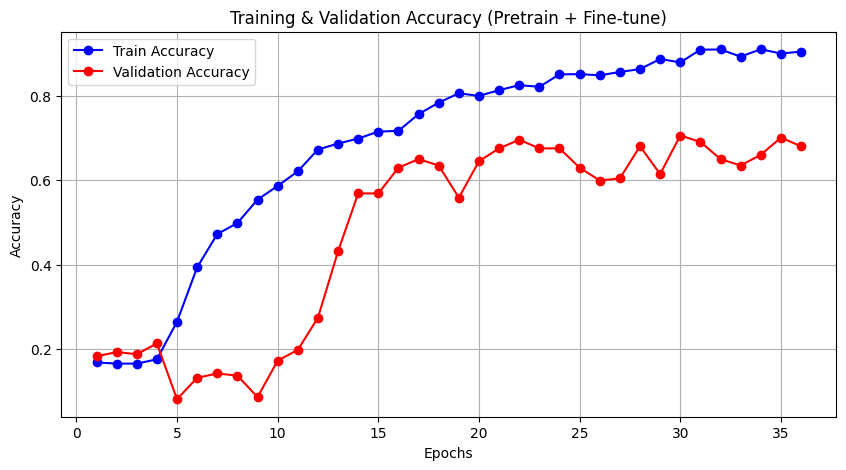

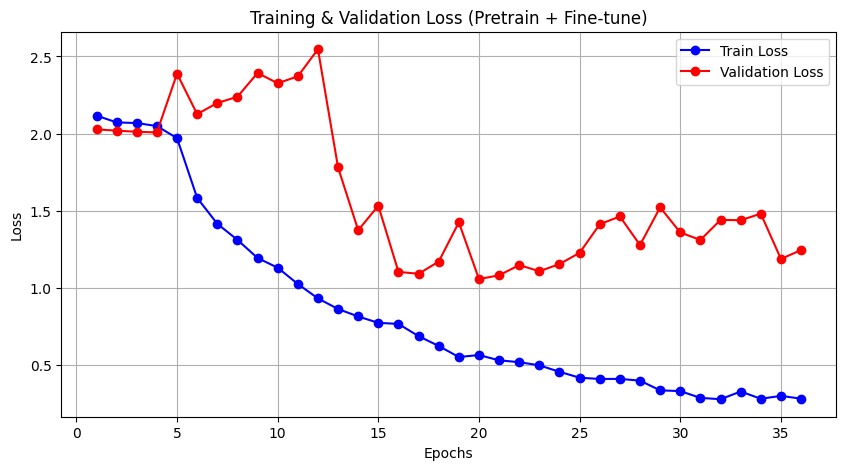

In [ ]:
import matplotlib.pyplot as plt

# --- Gabungkan history pretraining + fine-tuning ---
all_train_acc = train_acc + fine_train_acc
all_val_acc = val_acc + fine_val_acc
all_train_loss = train_loss + fine_train_loss
all_val_loss = val_loss + fine_val_loss

epochs = range(1, len(all_train_acc)+1)

# --- Plot Accuracy ---
plt.figure(figsize=(10,5))
plt.plot(epochs, all_train_acc, 'bo-', label='Train Accuracy')
plt.plot(epochs, all_val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy (Pretrain + Fine-tune)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot Loss ---
plt.figure(figsize=(10,5))
plt.plot(epochs, all_train_loss, 'bo-', label='Train Loss')
plt.plot(epochs, all_val_loss, 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss (Pretrain + Fine-tune)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# --- 1. Evaluate model di test set ---
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# --- 2. Predict kelas test set ---
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# --- 3. Classification report ---
class_names = le.classes_  # nama kelas dari LabelEncoder
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


NameError: name 'model' is not defined